In [17]:
import pandas as pd 

In [18]:
df = pd.read_csv("mortality_status.csv")
df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,0,0,0,1,3,1,4,1,1,24,1,60,2
1,50,1,1,1,2,0,2,1,35,1,1,14,5,62,2
2,58,1,2,2,4,0,2,1,63,1,1,14,7,75,2
3,58,1,0,0,0,1,3,1,18,1,1,2,1,84,2
4,47,1,1,0,1,1,3,1,41,1,1,3,1,50,2


In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3981 entries, 0 to 3980
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3981 non-null   int64
 1   Sex                     3981 non-null   int64
 2   T_Stage                 3981 non-null   int64
 3   N_Stage                 3981 non-null   int64
 4   6th_Stage               3981 non-null   int64
 5   Differentiated          3981 non-null   int64
 6   Grade                   3981 non-null   int64
 7   A_Stage                 3981 non-null   int64
 8   Tumor_Size              3981 non-null   int64
 9   Estrogen_Status         3981 non-null   int64
 10  Progesterone_Status     3981 non-null   int64
 11  Regional_Node_Examined  3981 non-null   int64
 12  Reginol_Node_Positive   3981 non-null   int64
 13  Survival_Months         3981 non-null   int64
 14  Mortality_Status        3981 non-null   int64
dtypes: int64(15)
memory u

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000
mean,53.978397,0.995227,0.782969,0.436071,1.317257,0.690279,2.152725,0.977644,30.346898,0.932429,0.826426,14.371515,4.144436,71.567445,2.302939
std,8.964841,0.068928,0.764883,0.692200,1.265140,1.014854,0.638612,0.147858,21.032948,0.251040,0.378791,8.136825,5.097589,22.523651,0.735437
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-75.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000
25%,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,2.000000
50%,54.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,2.000000
75%,61.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,2.000000
max,69.000000,1.000000,3.000000,2.000000,4.000000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,6.000000


In [20]:
x = df.drop(columns=["Mortality_Status"])
y = df["Mortality_Status"]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ("lr", LogisticRegression(max_iter=10000, random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=14,metric="manhattan"))
], voting="soft")
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=14))],
                 voting='soft')

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay
y_pred = ensemble.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8895859473023839


Text(0.5, 0, 'Predicted Label')

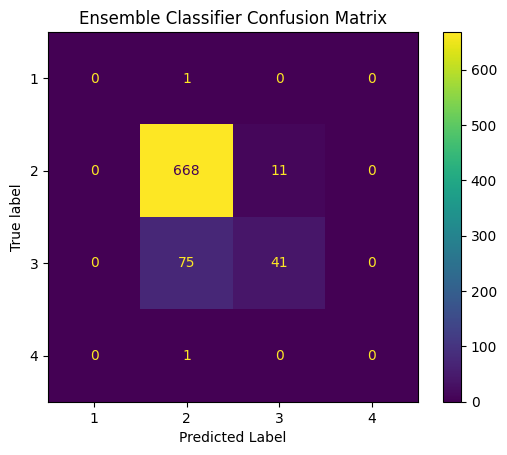

In [24]:
ensemble_cm_text = confusion_matrix(y_test, y_pred)
ensemble_cm = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm_text, display_labels=list(range(1, ensemble_cm_text.shape[0] + 1)))
ensemble_cm.plot()
ensemble_cm.ax_.set_title("Ensemble Classifier Confusion Matrix")
ensemble_cm.ax_.set_xlabel("Predicted Label")

In [25]:
# Get the unique classes from y_test
unique_classes = sorted(y_test.unique())
target_names = [f"Class {cls}" for cls in unique_classes]

# Print the classification report with the correct target names
print("classification report", classification_report(y_test, y_pred, target_names=target_names))

classification report               precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         1
     Class 2       0.90      0.98      0.94       679
     Class 4       0.79      0.35      0.49       116
     Class 6       0.00      0.00      0.00         1

    accuracy                           0.89       797
   macro avg       0.42      0.33      0.36       797
weighted avg       0.88      0.89      0.87       797



g:\ML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\ML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\ML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
sur_m = pd.read_csv("survival_period.csv")
sur_m.head()
sur_m.info()
sur_m.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3981 entries, 0 to 3980
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3981 non-null   int64
 1   Sex                     3981 non-null   int64
 2   T_Stage                 3981 non-null   int64
 3   N_Stage                 3981 non-null   int64
 4   6th_Stage               3981 non-null   int64
 5   Differentiated          3981 non-null   int64
 6   Grade                   3981 non-null   int64
 7   A_Stage                 3981 non-null   int64
 8   Tumor_Size              3981 non-null   int64
 9   Estrogen_Status         3981 non-null   int64
 10  Progesterone_Status     3981 non-null   int64
 11  Regional_Node_Examined  3981 non-null   int64
 12  Reginol_Node_Positive   3981 non-null   int64
 13  Survival_Months         3981 non-null   int64
 14  Mortality_Status        3981 non-null   int64
dtypes: int64(15)
memory u

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000
mean,53.978397,0.995227,0.782969,0.436071,1.317257,0.690279,2.152725,0.977644,30.346898,0.932429,0.826426,14.371515,4.144436,71.567445,2.302939
std,8.964841,0.068928,0.764883,0.692200,1.265140,1.014854,0.638612,0.147858,21.032948,0.251040,0.378791,8.136825,5.097589,22.523651,0.735437
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-75.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000
25%,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,2.000000
50%,54.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,2.000000
75%,61.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,2.000000
max,69.000000,1.000000,3.000000,2.000000,4.000000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,6.000000


In [30]:
x = sur_m.drop(columns=["Survival_Months"])
y = sur_m["Survival_Months"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 846.336574654956


In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 23.585319949811794
MSE: 846.336574654956
R2: -0.8160878720215137
